In [1]:
from test_case_utils import WeatherParams, TestCase, TargetCases, MlflowConfig
from geo_plot_utils import xlabels_from_times, timeseries_geo_plot

class Cfg:
    rain_temp_humid_eval_run_id = '7e8bb6ce24704ed3bf1b79912d9d8438'
    rain_only_eval_run_id = '5e8971a99ff84824bcc199d160cf5389'

/home/akira/anaconda3/envs/poteka-pipeline-pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def visualize_timeseries_attention_maps(
    test_case_name: str,
    eval_run_id: str,
    target_layer_nums: list[int] = [1, 4],
    save_fig_path = None,
):
    pred_seq_length = 6
    test_case = TestCase(test_case_name, run_id=eval_run_id)
    fig = plt.figure(constrained_layout=True, figsize=(21, 14))
    fig.suptitle('{} Case Attention Maps'.format(test_case.date.replace('-', '/')), fontsize=20)
    subfigs = fig.subfigures(nrows=len(target_layer_nums), ncols=1)
    for row, subfig in enumerate(subfigs):
        target_layer_num = target_layer_nums[row]
        data = [
            np.load(f) for f in test_case.data_pathes['attention_maps'][f'layer{target_layer_num}']
        ]
        timeseries_geo_plot(subfig, f'SA-ConvLSTM Layer: {target_layer_num}', target_param='attention_map', data=data, xlabels=xlabels_from_times(test_case.input_times))
    if save_fig_path:
        plt.savefig(save_fig_path)
    plt.show()
    plt.close()



TC_case_2020-10-12_8-0_start


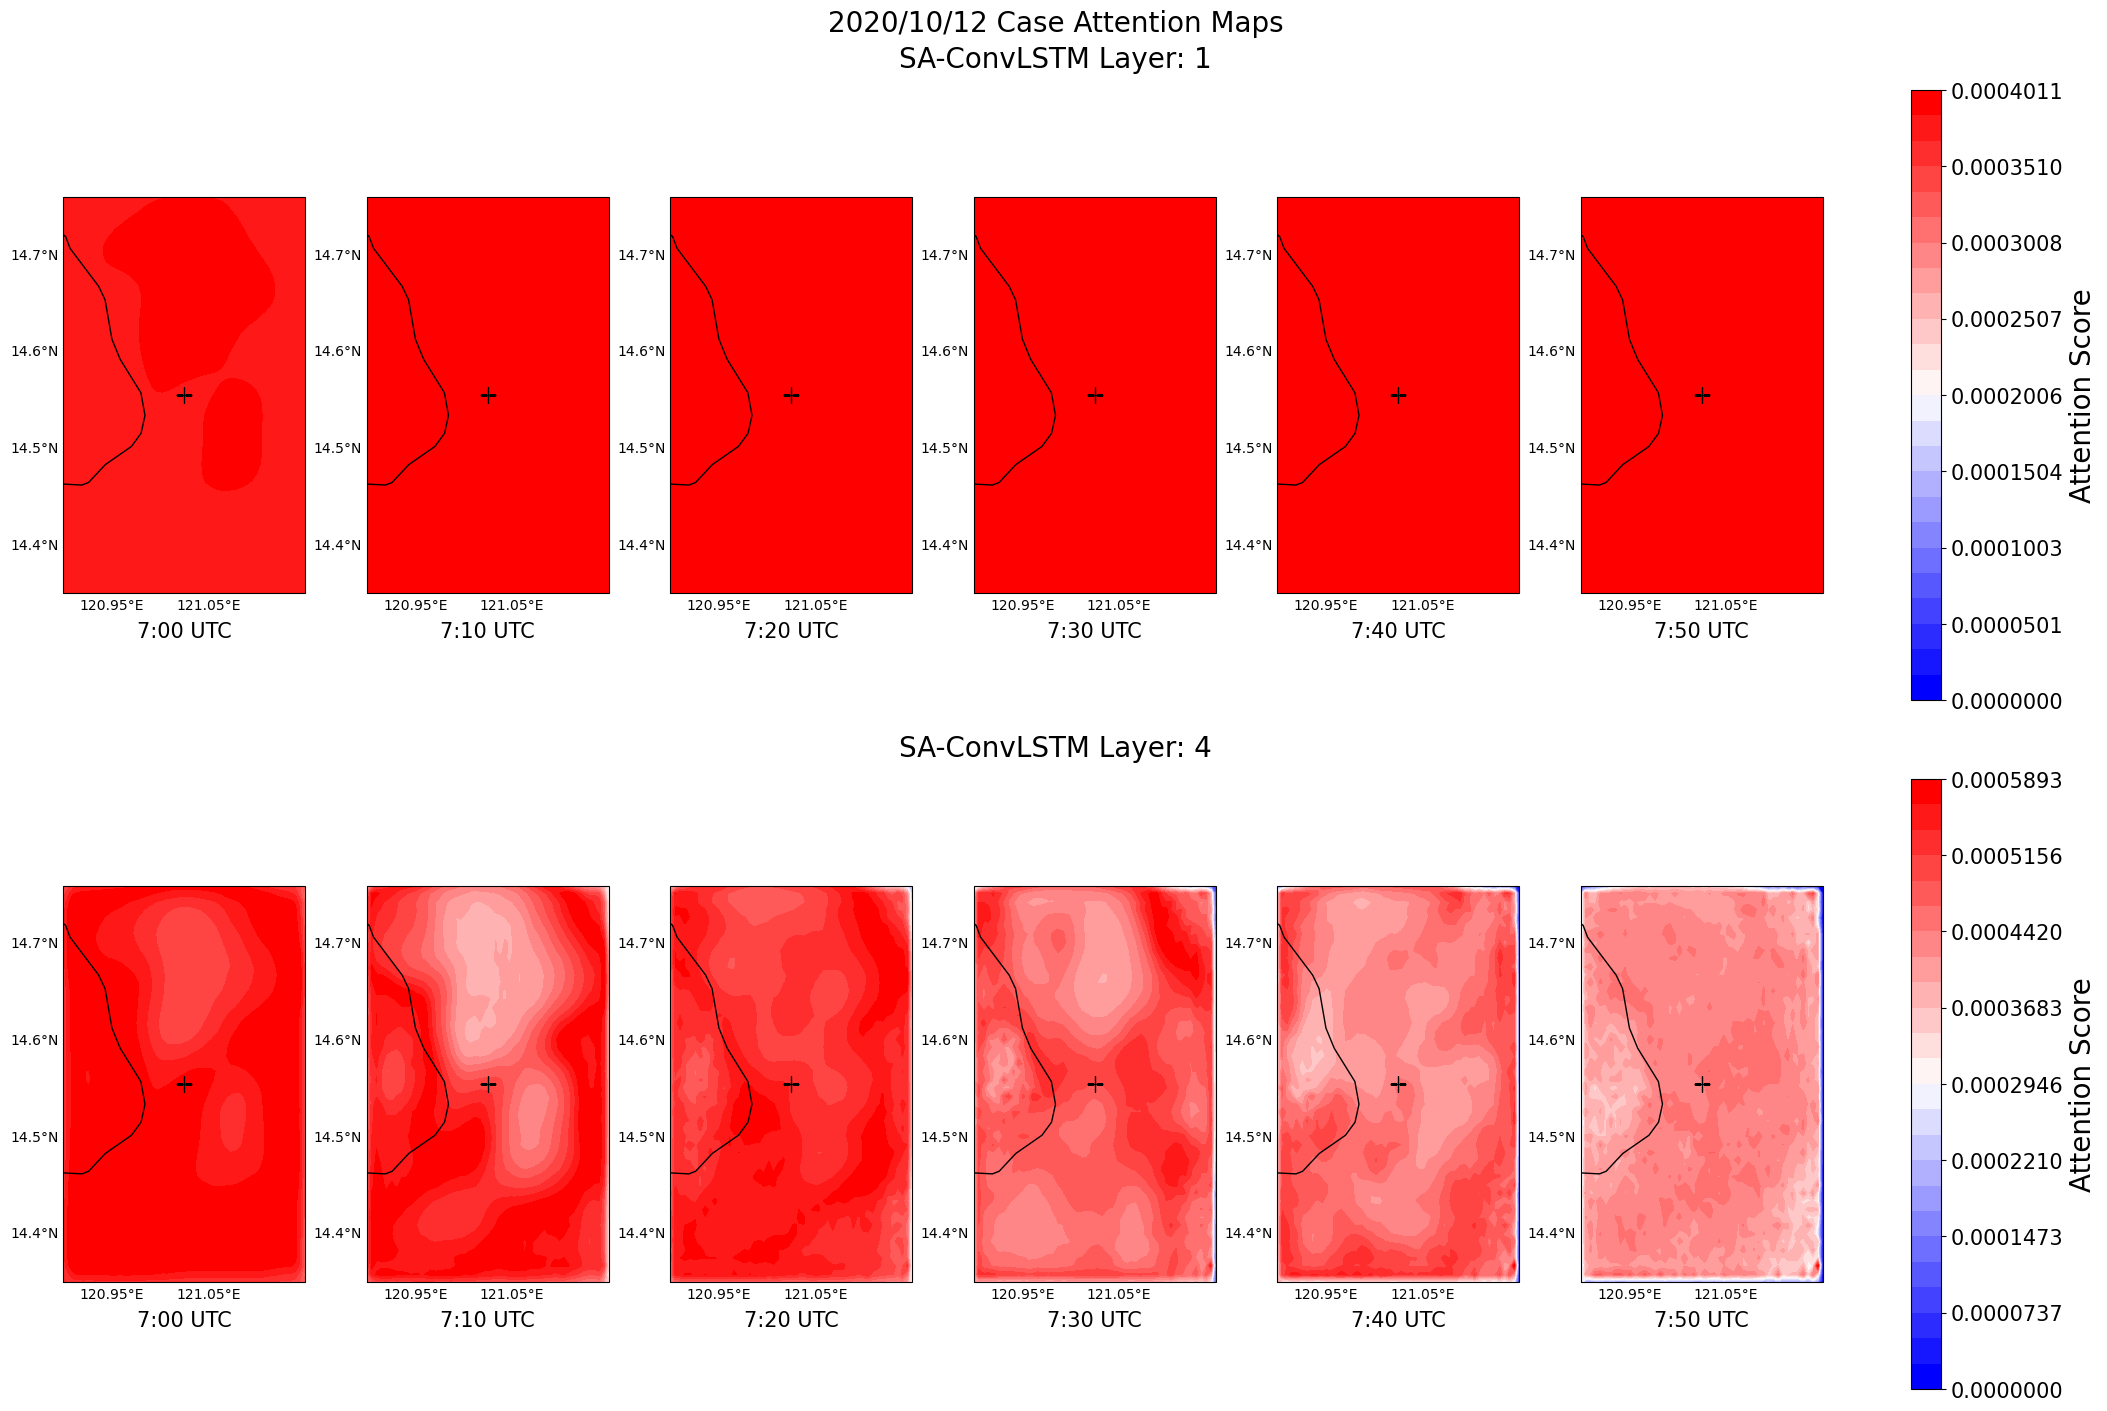

NOT_TC_case_2019-10-12_8-40_start


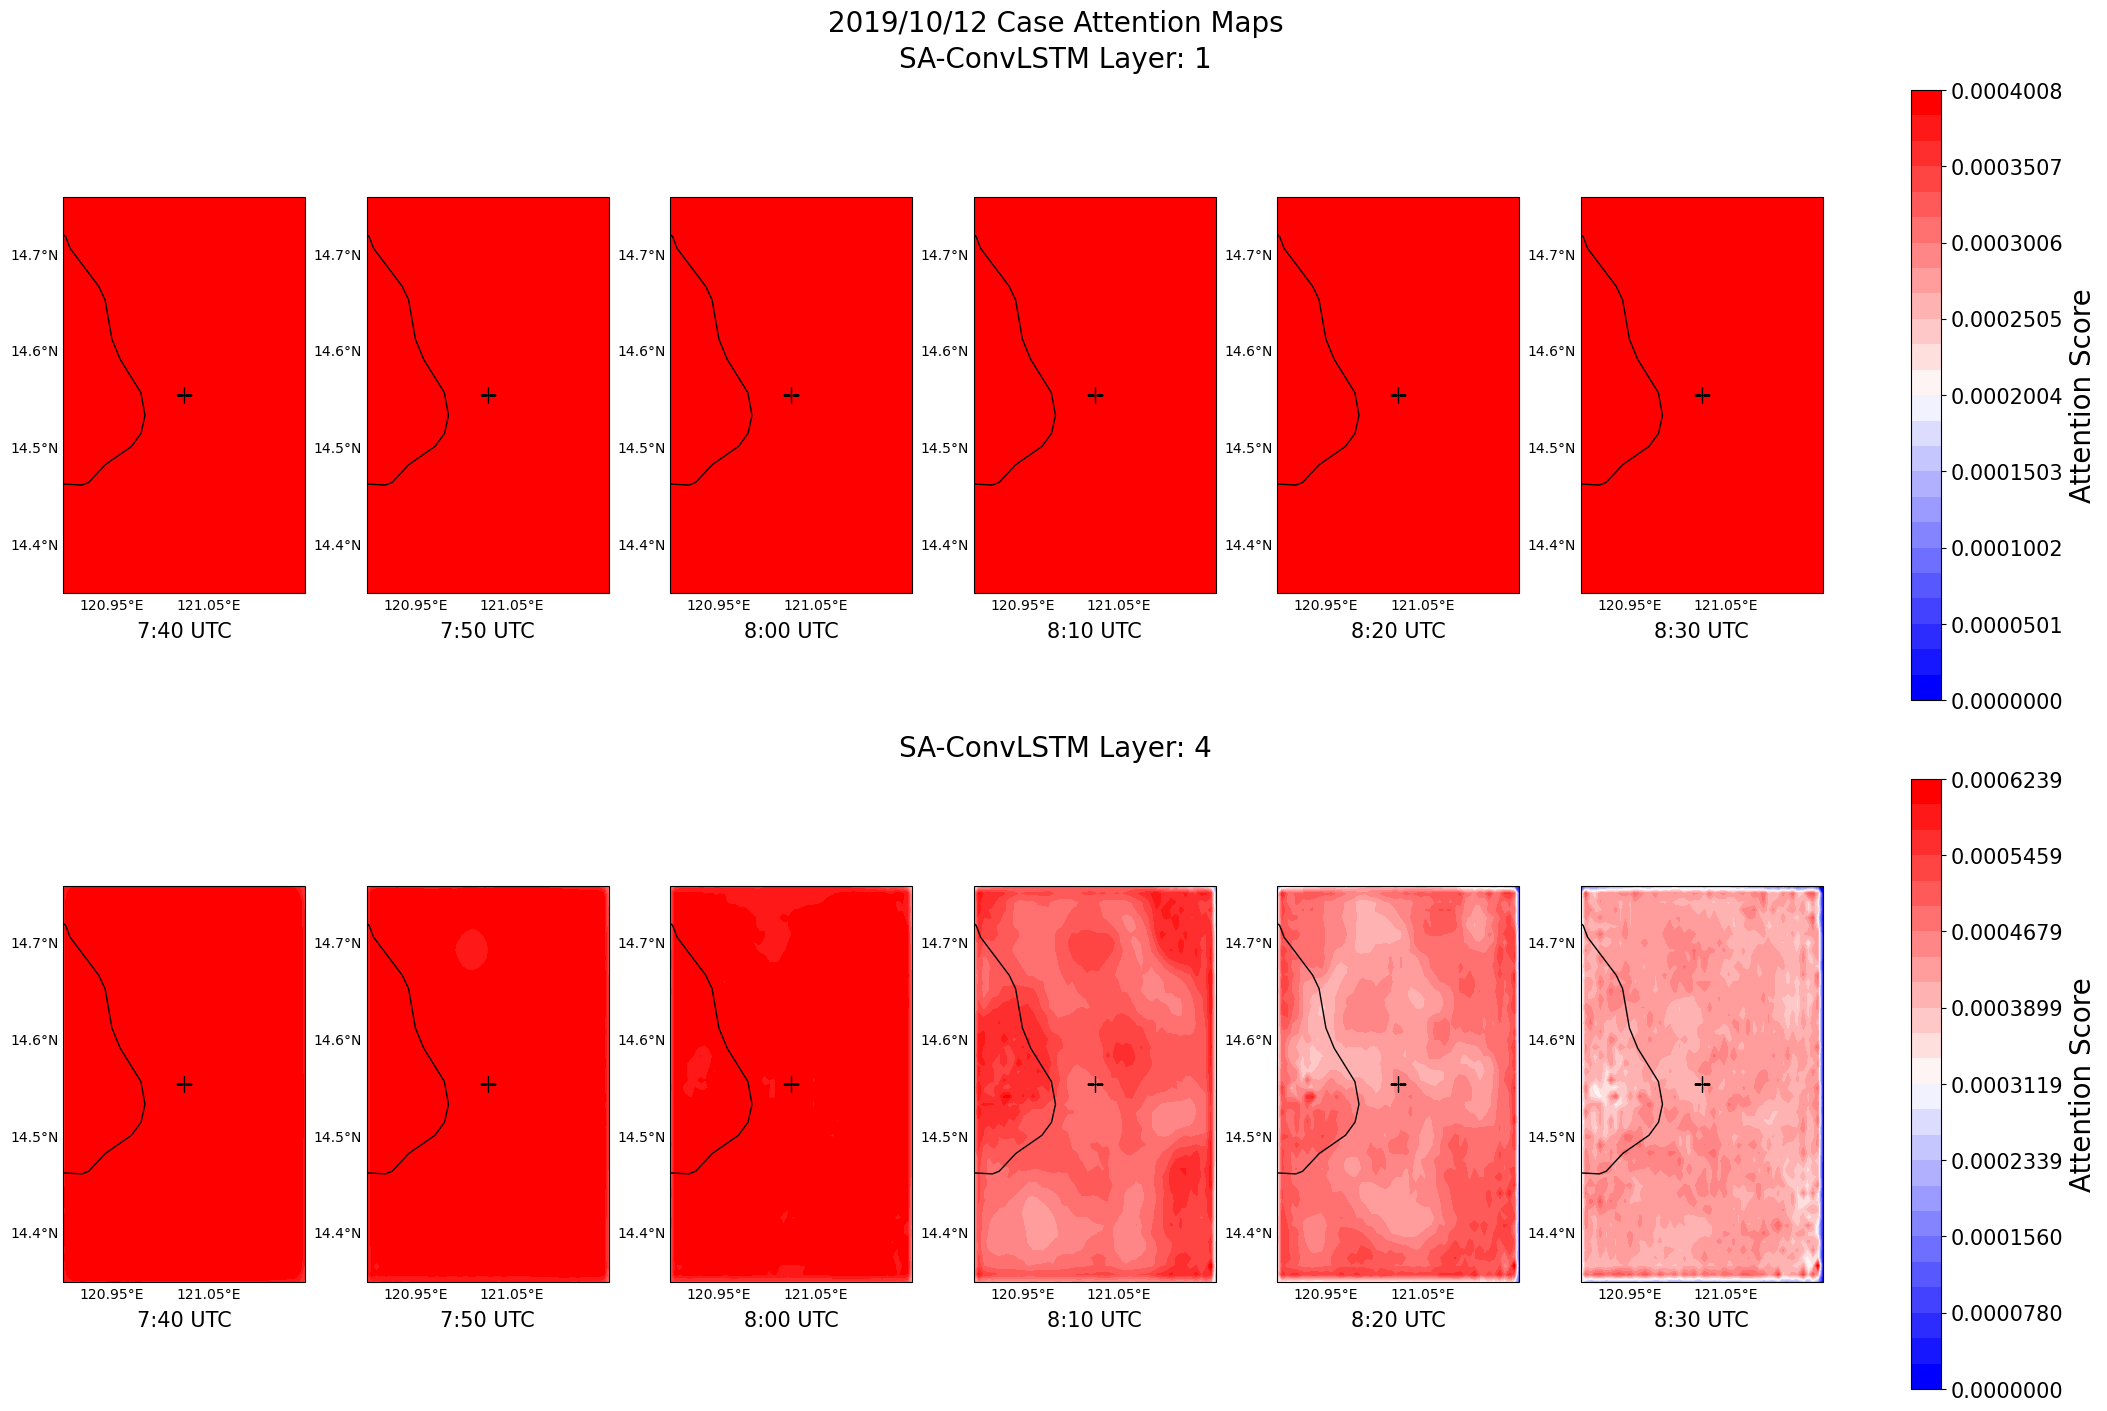

TC_case_2020-09-14_5-0_start


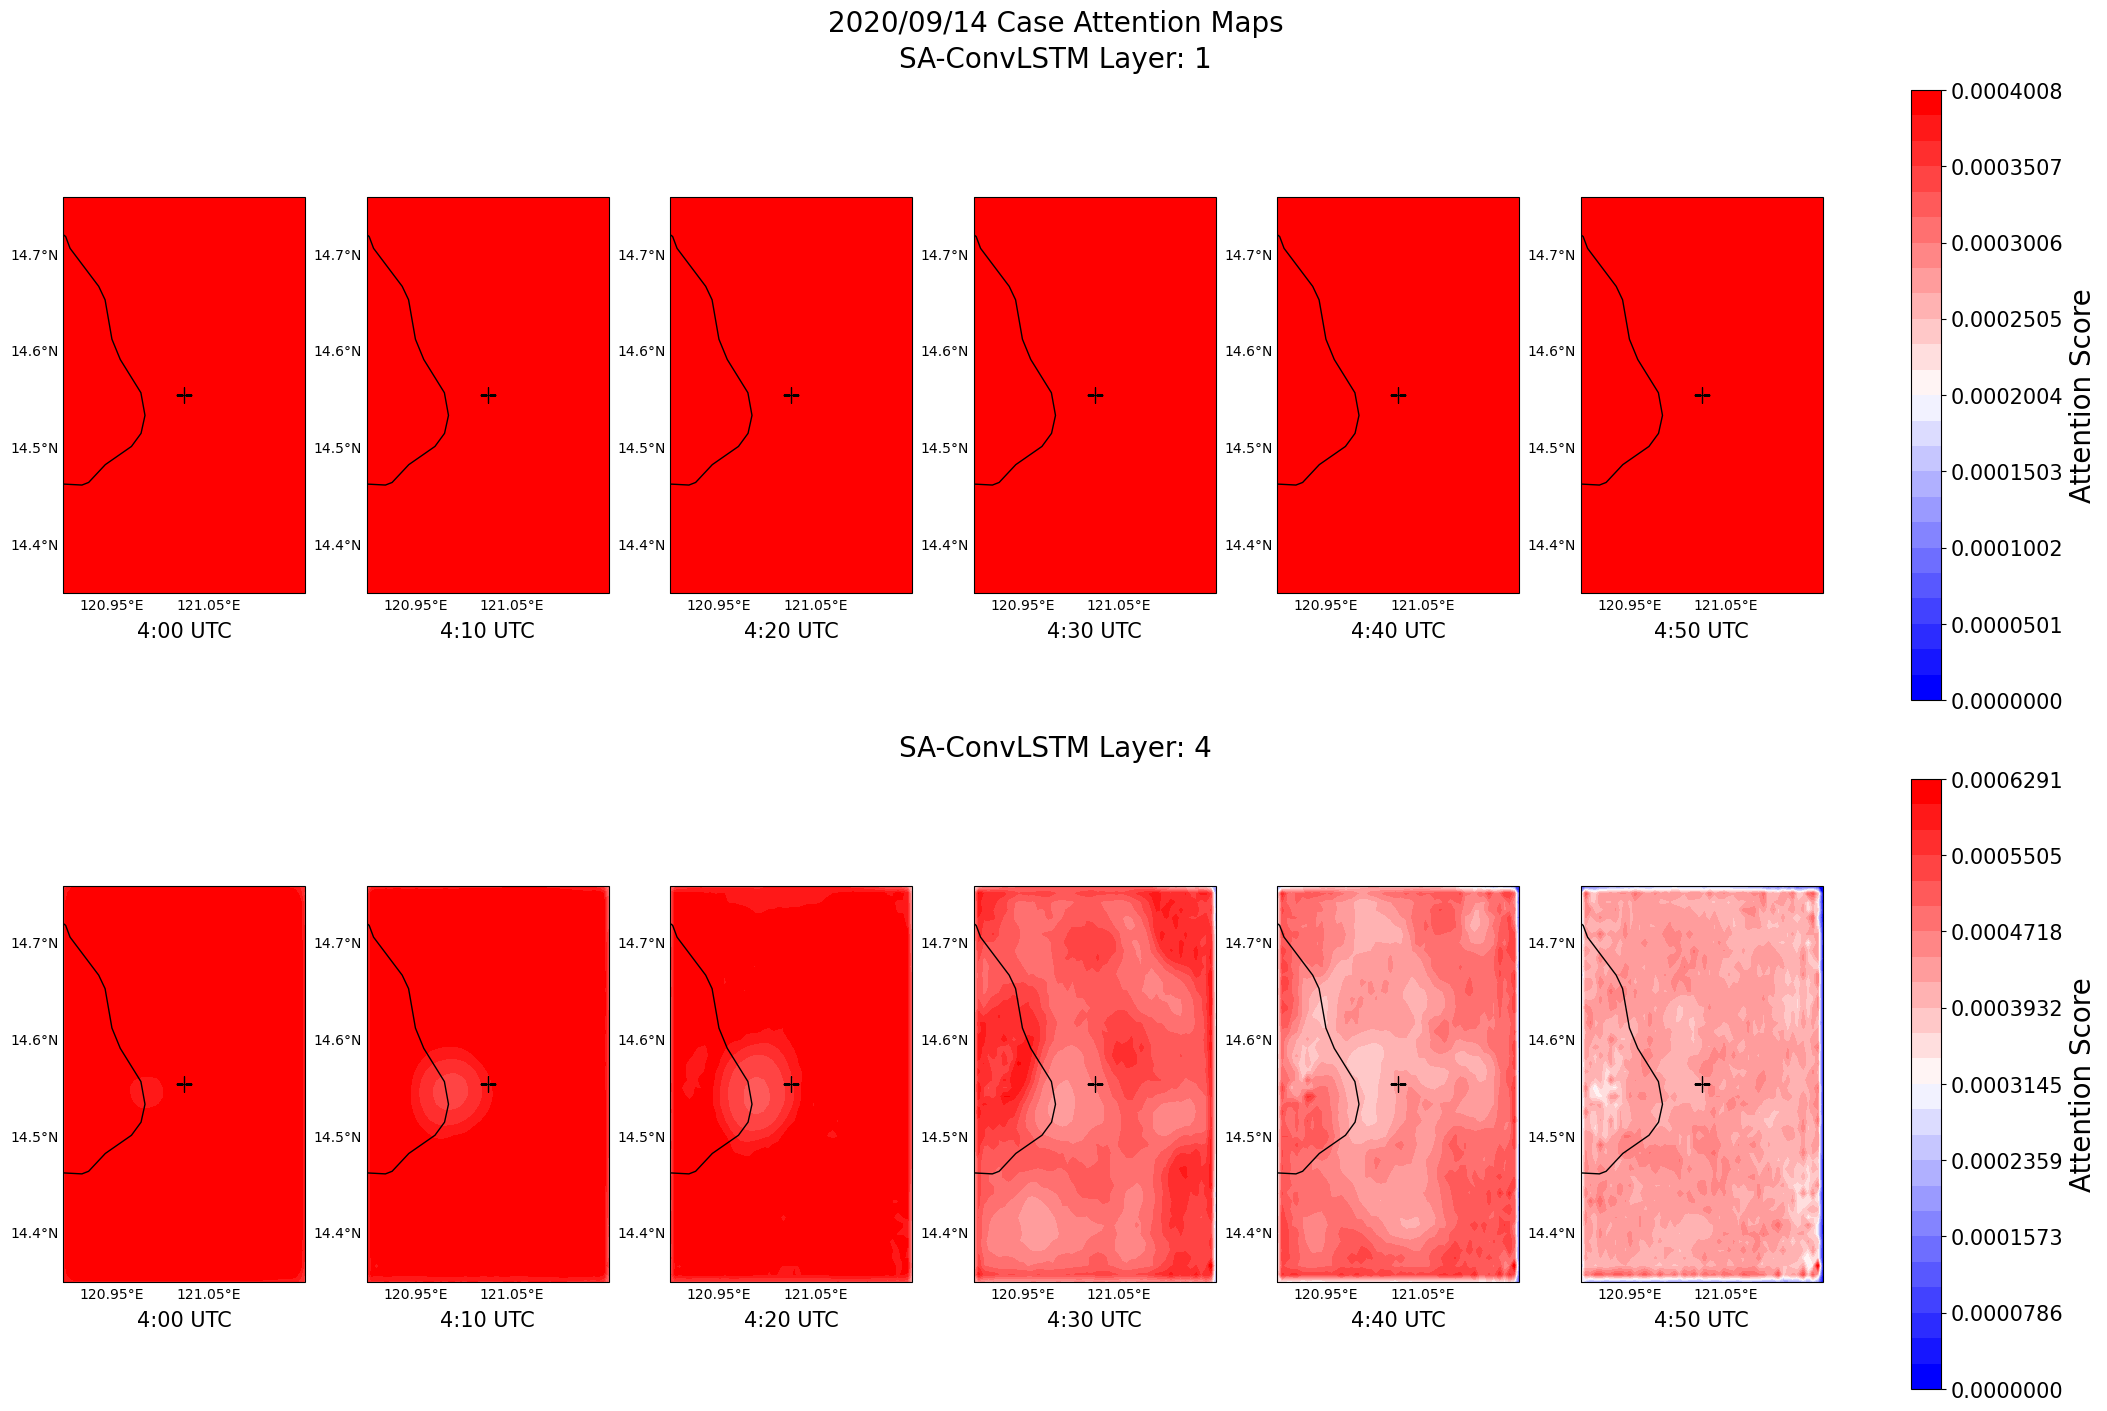

TC_case_2020-10-12_7-0_start


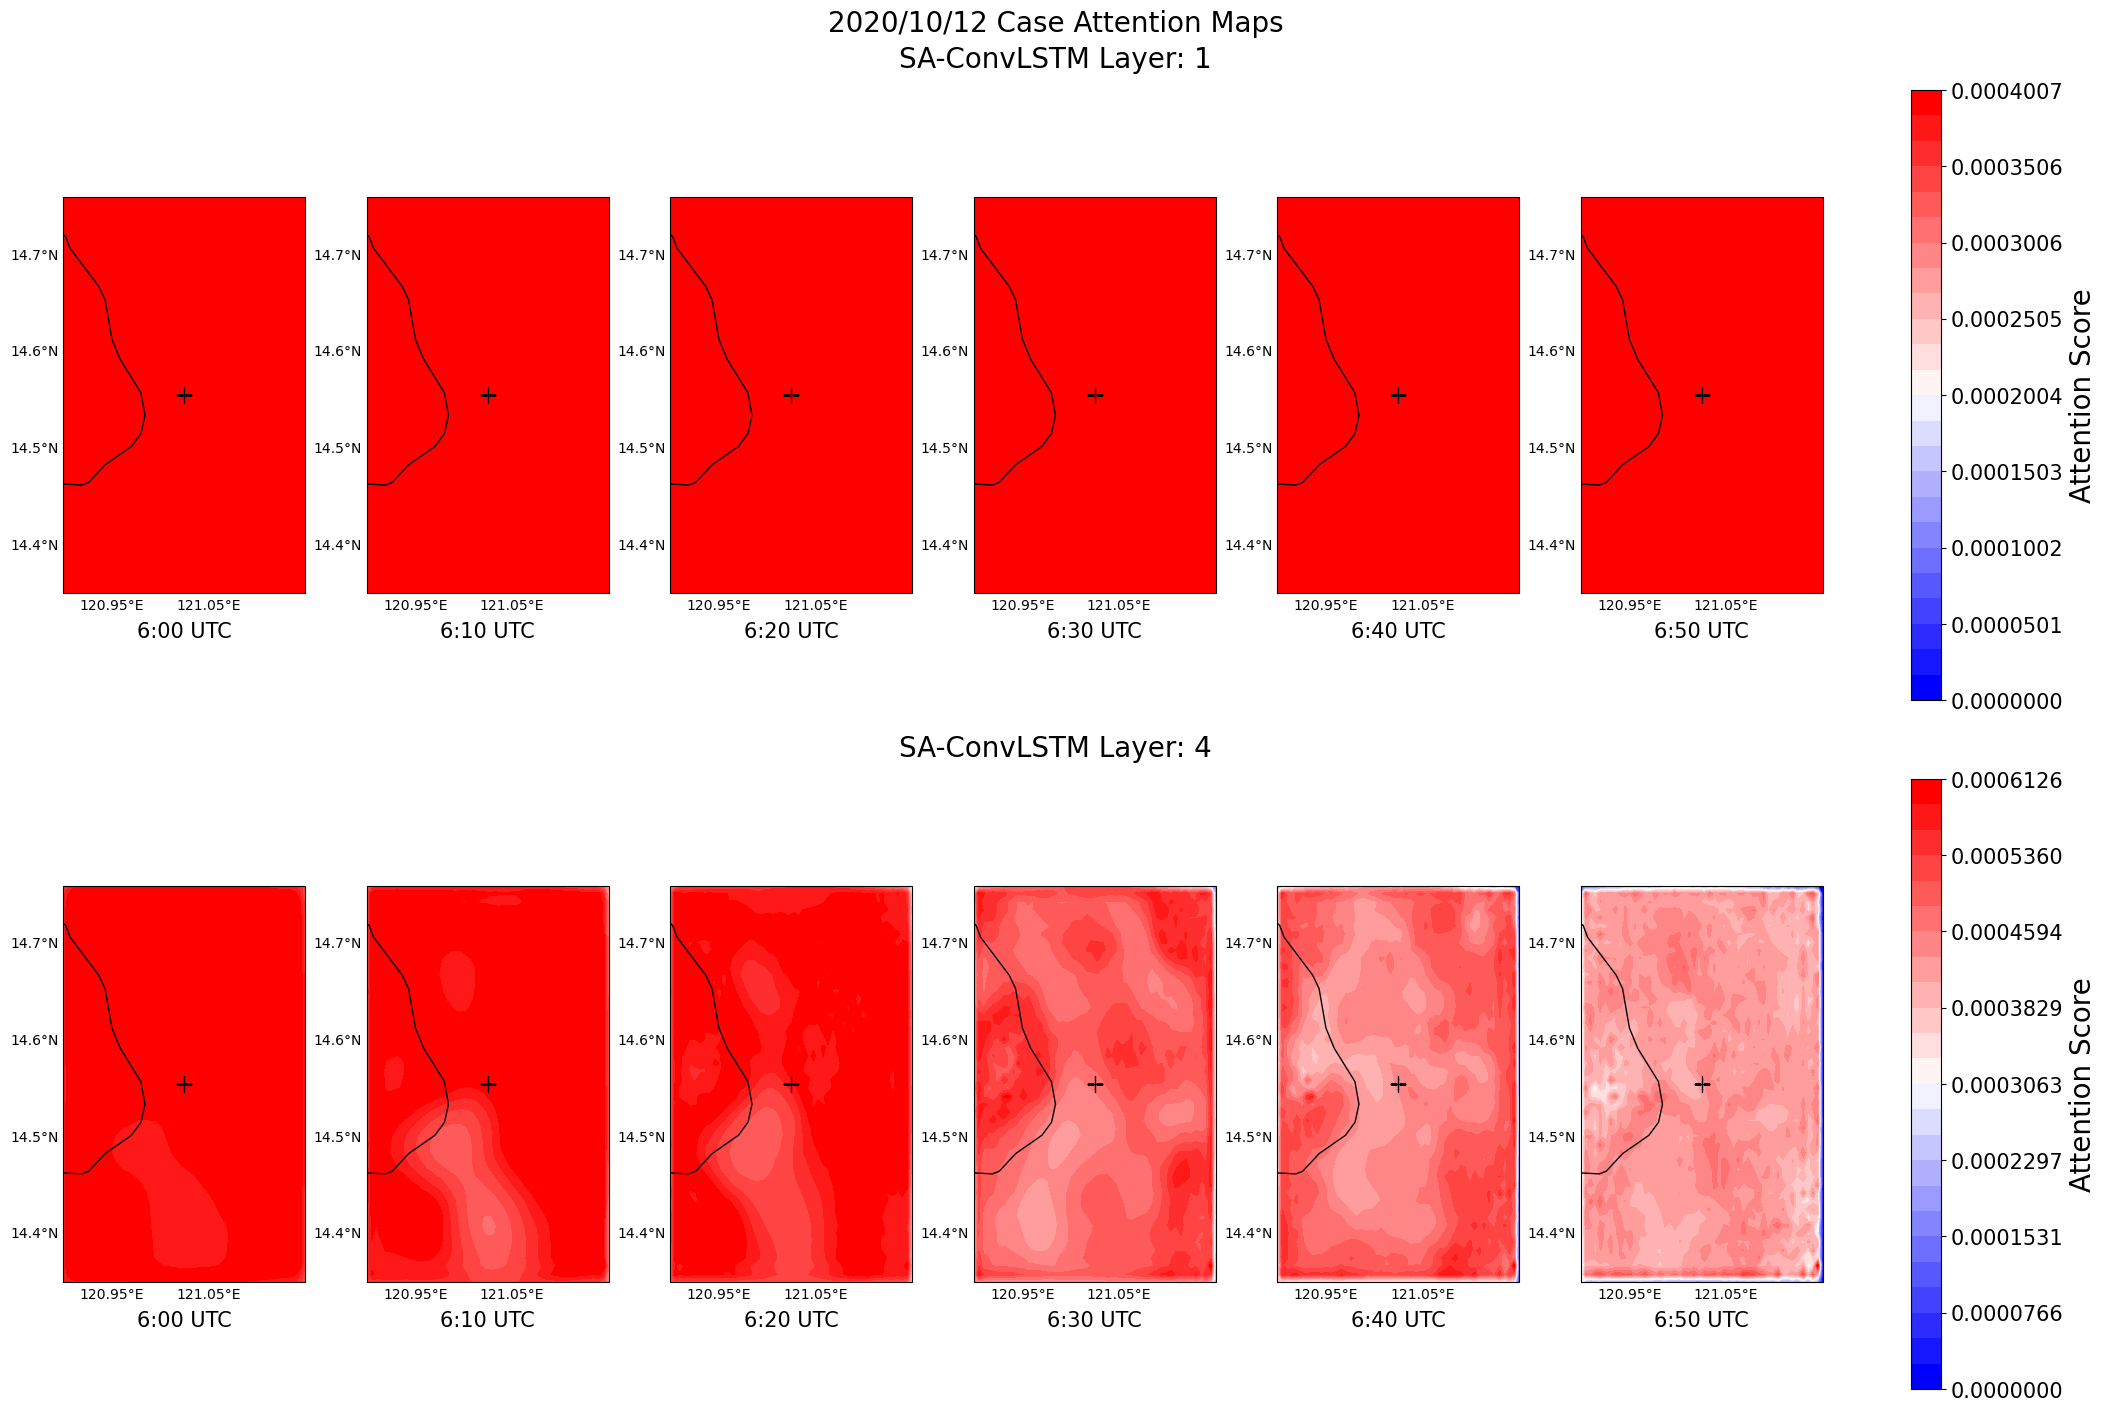

In [7]:
###
# Visualize Rain only model attention maps
###
for test_case_name in TargetCases.good_case_names + TargetCases.bad_case_names:
    print(test_case_name)
    visualize_timeseries_attention_maps(test_case_name, Cfg.rain_only_eval_run_id, target_layer_nums=[1, 4], save_fig_path=f'{test_case_name}-attentionmaps-worstmodel.png')

TC_case_2020-10-12_8-0_start


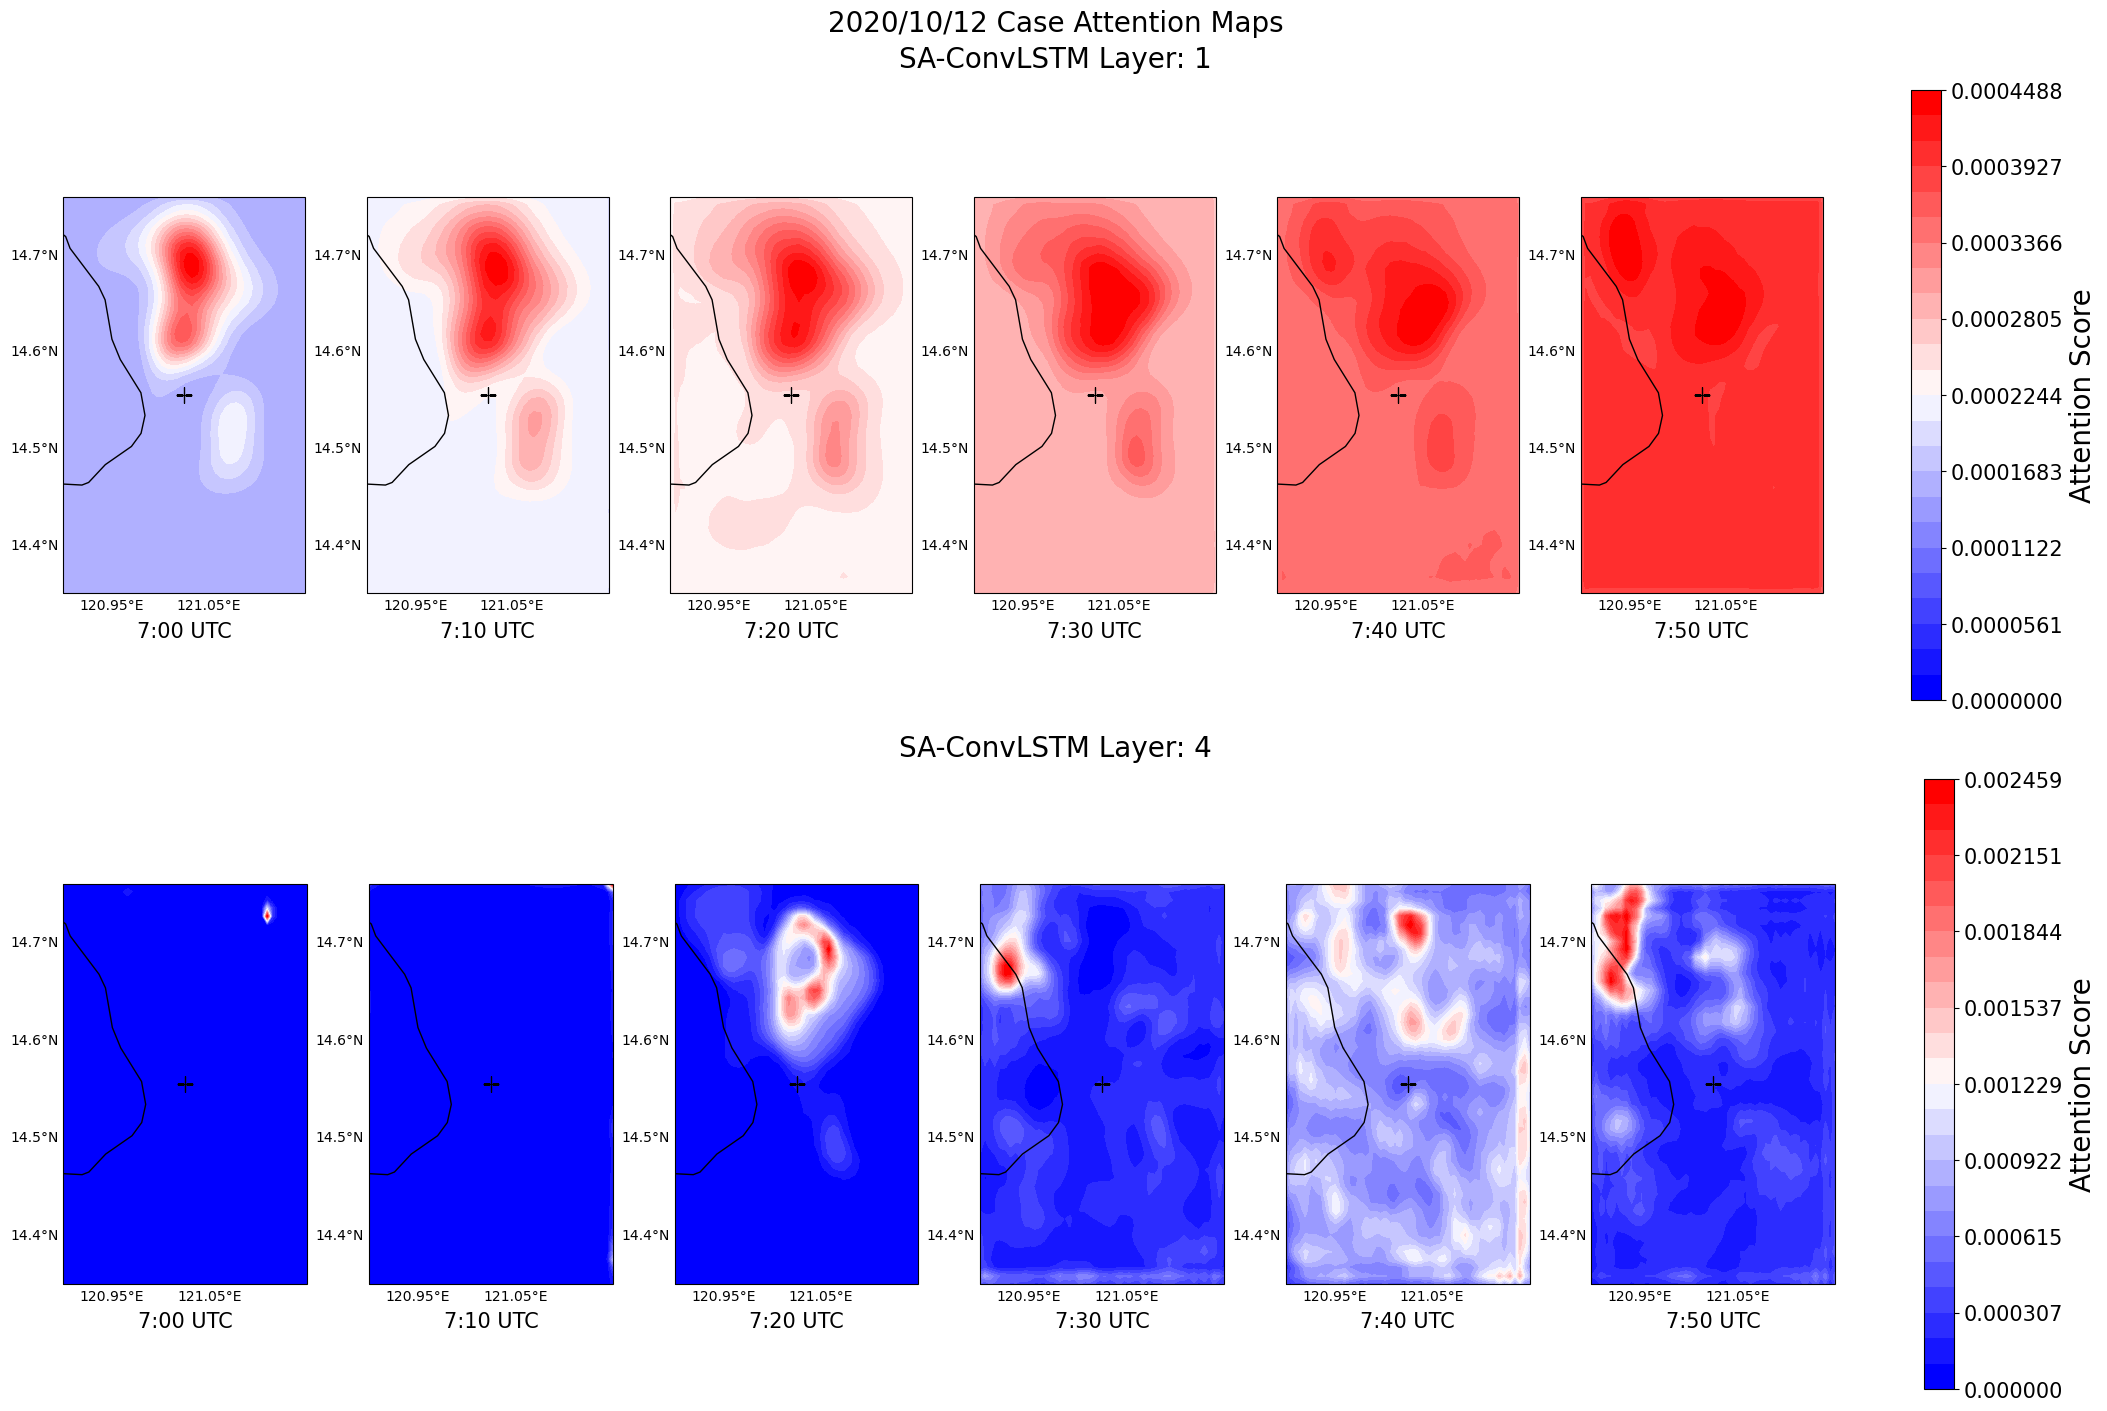

NOT_TC_case_2019-10-12_8-40_start


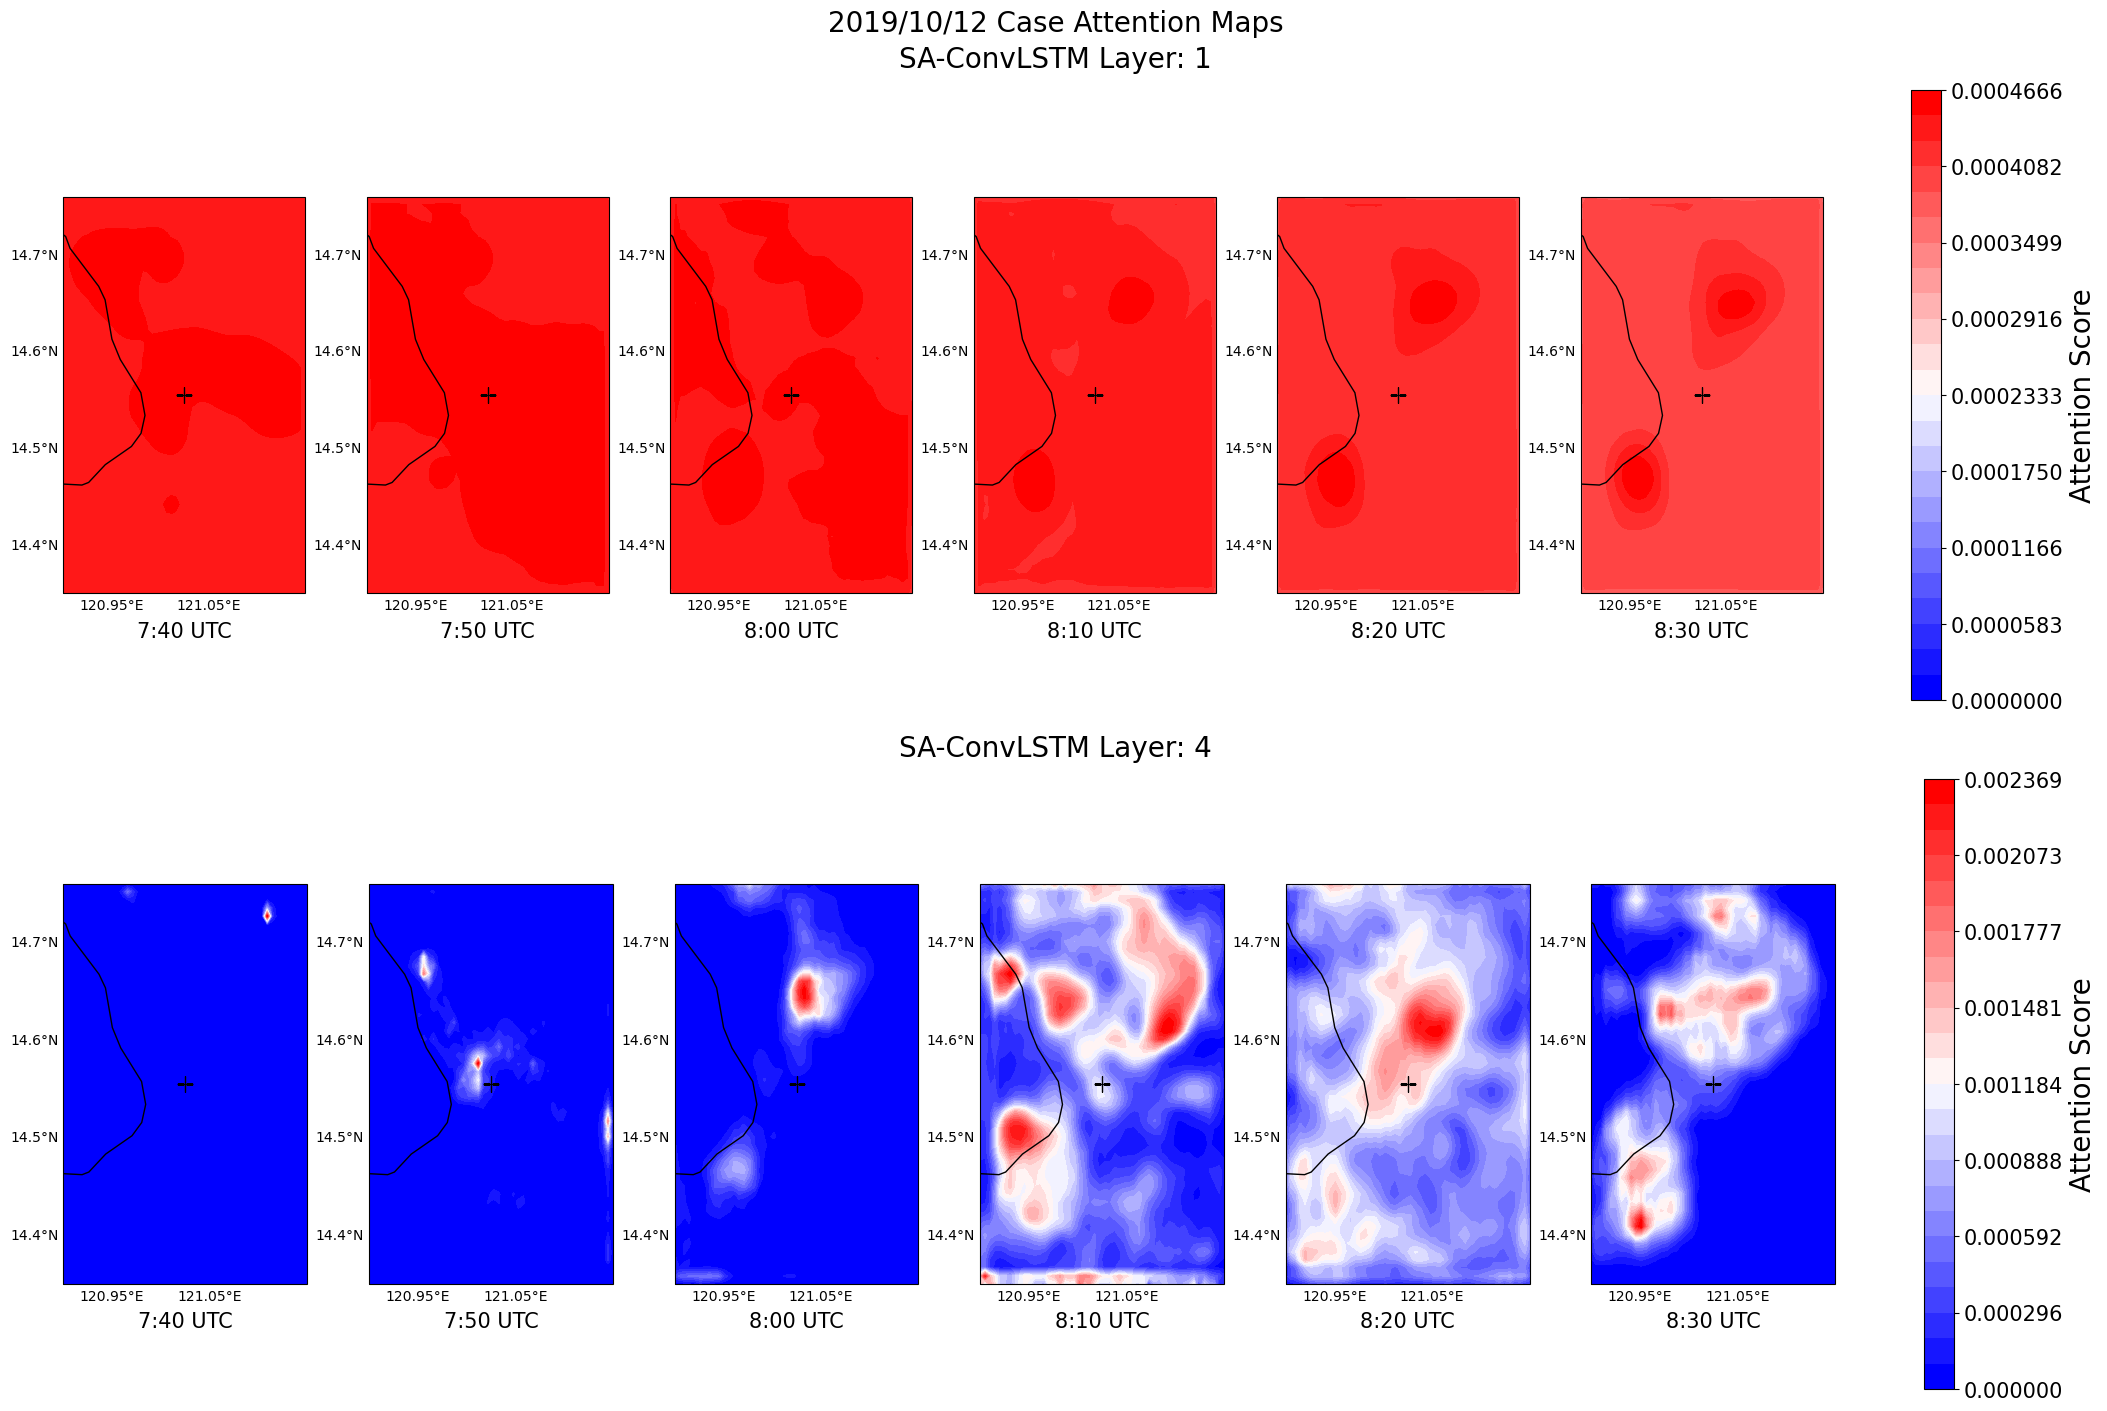

TC_case_2020-09-14_5-0_start


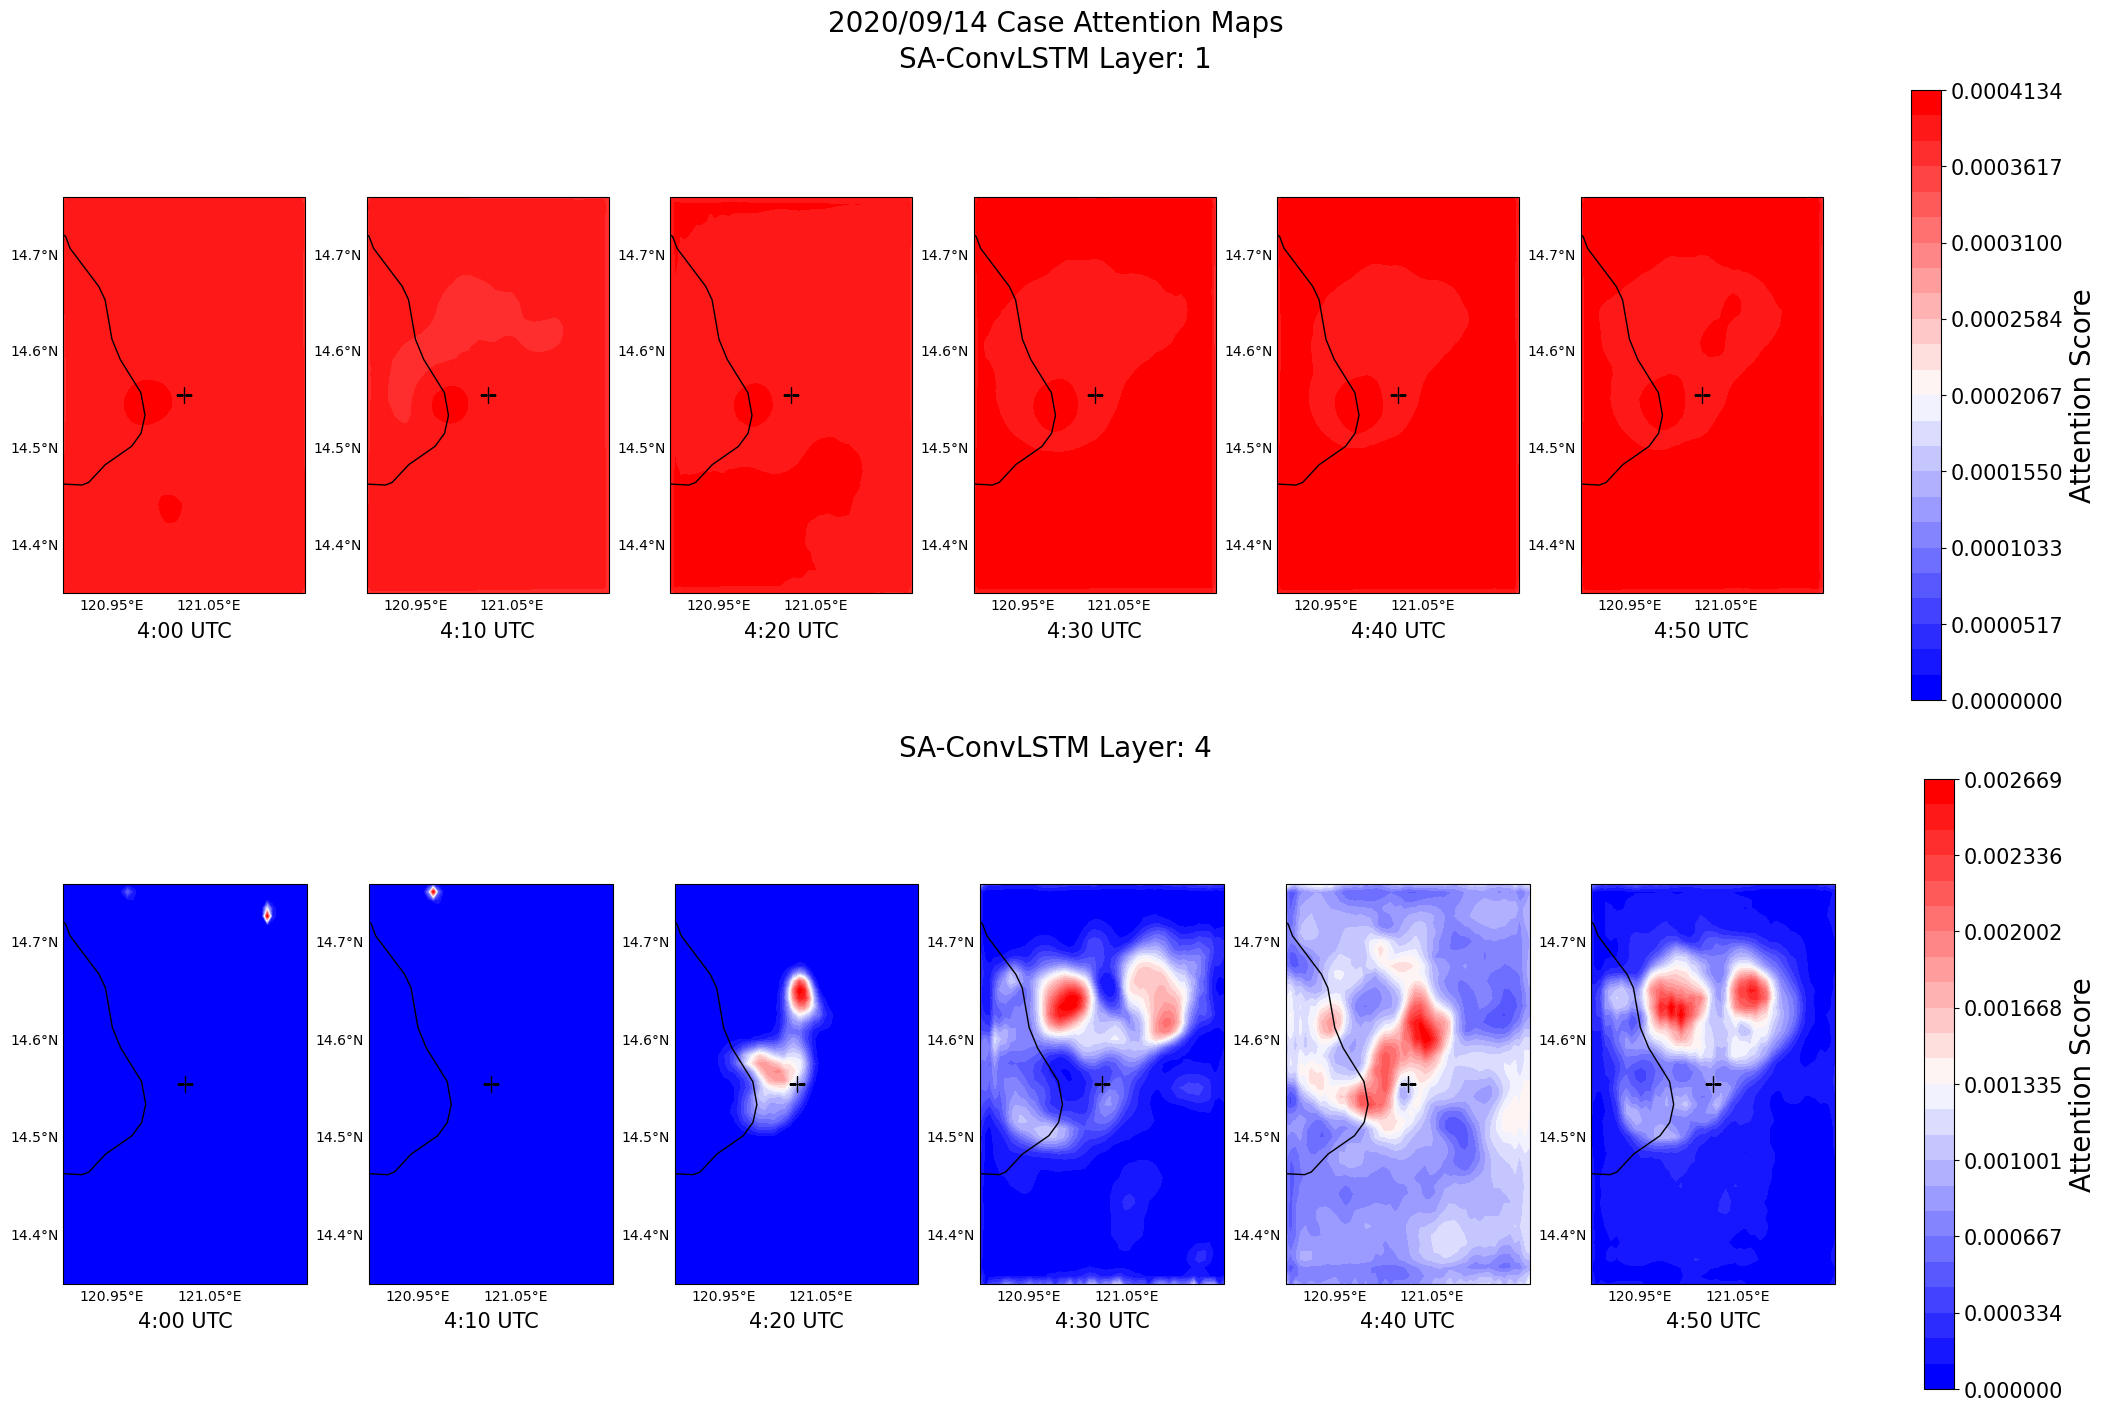

TC_case_2020-10-12_7-0_start


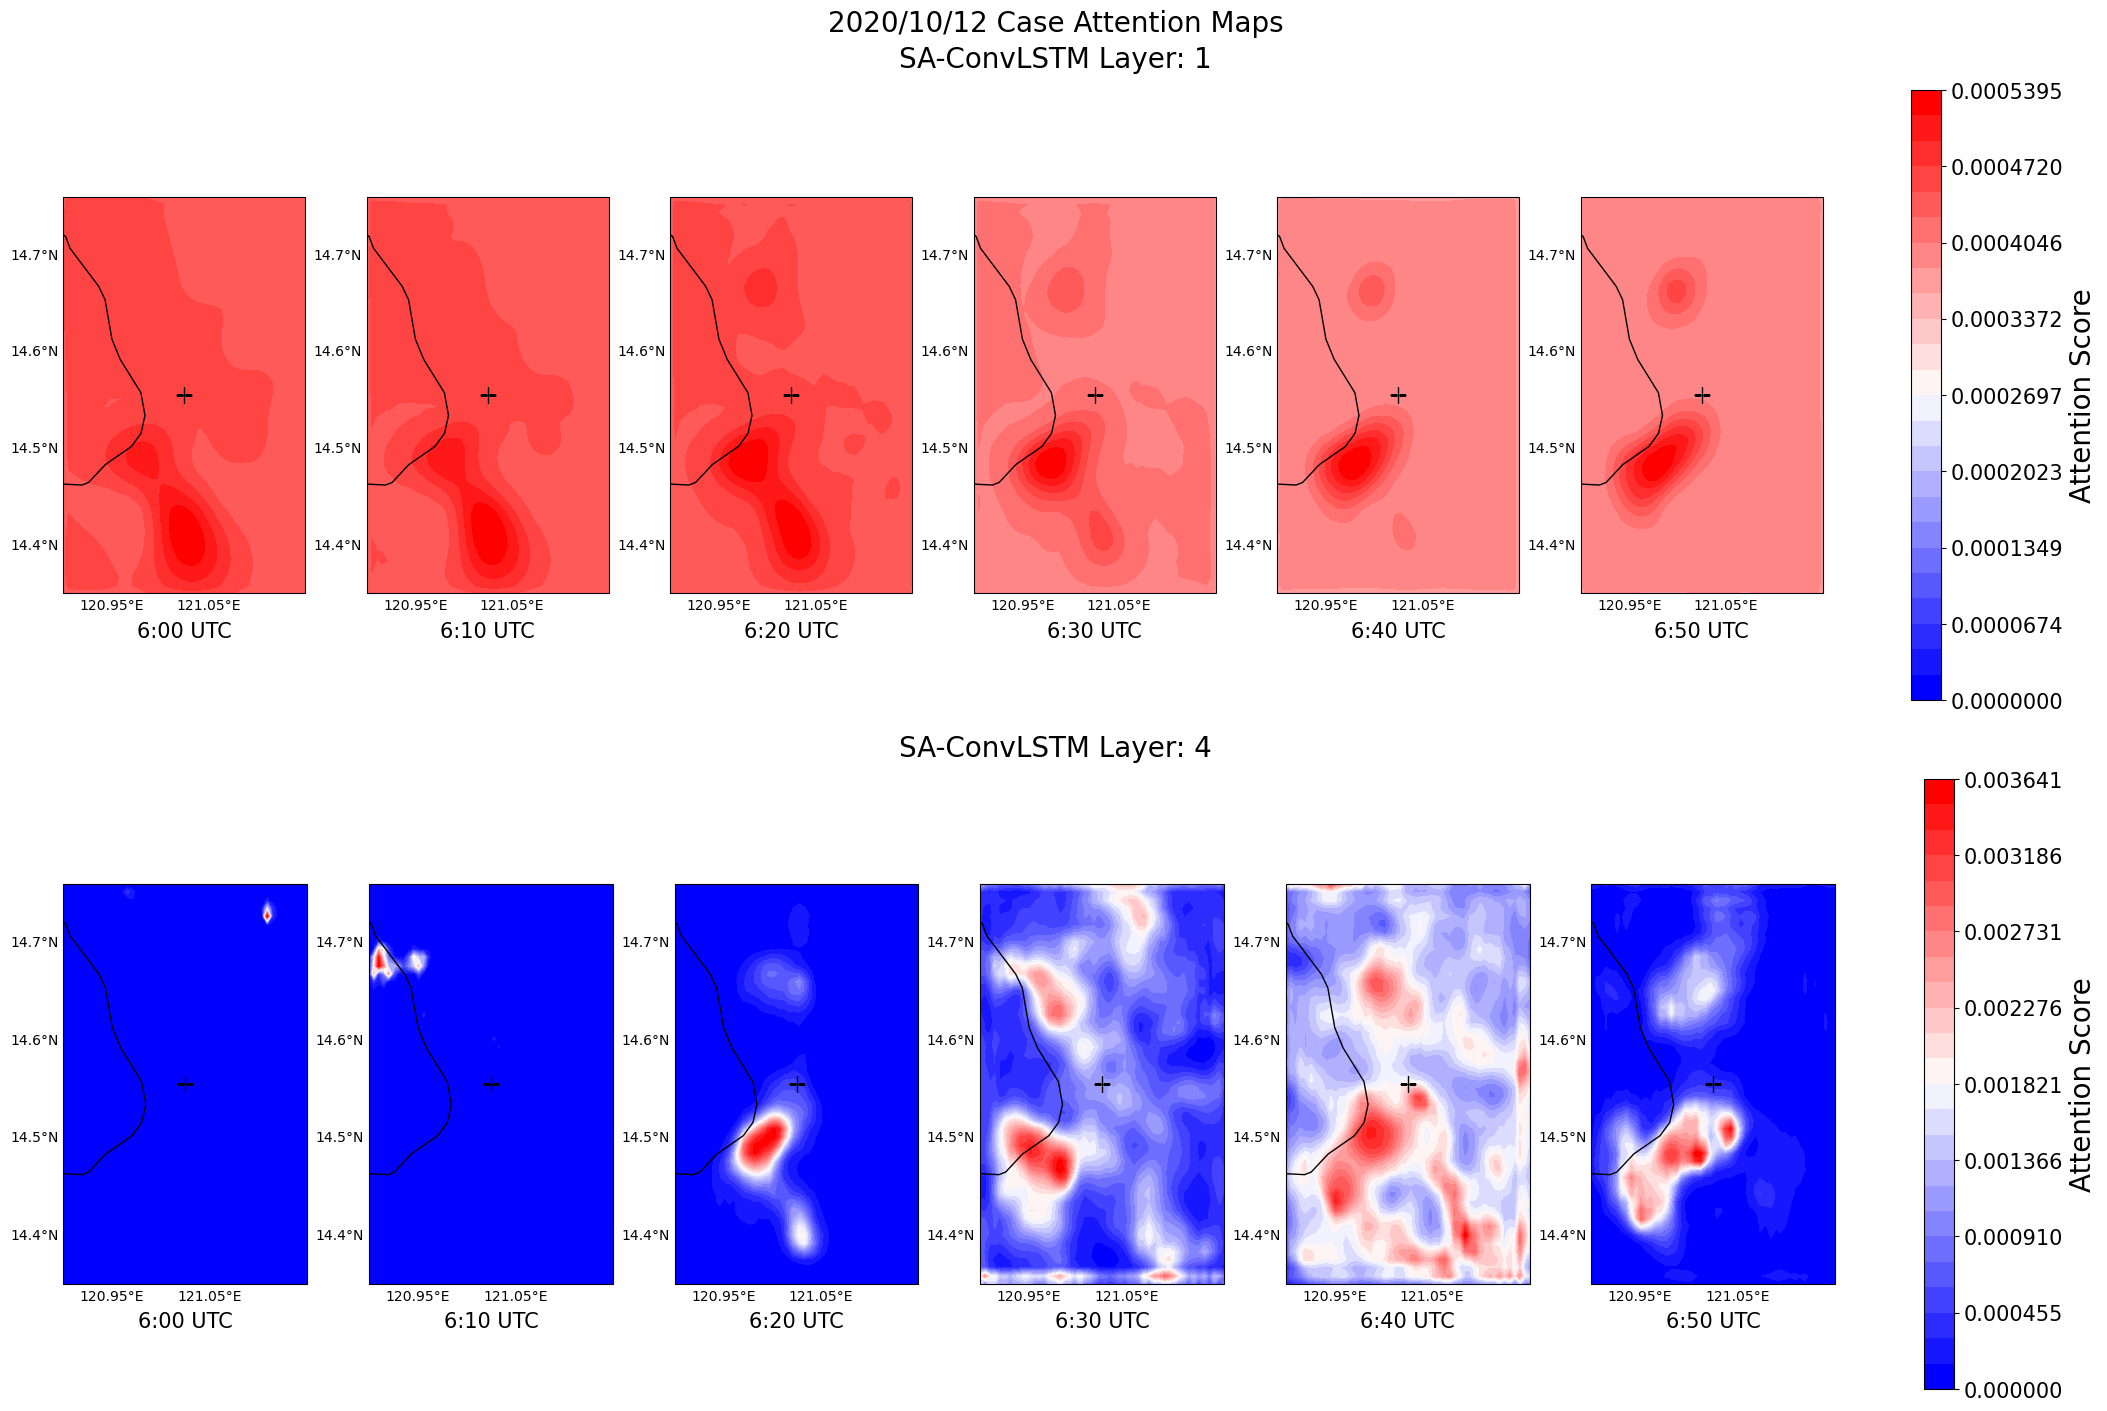

In [8]:
###
# Visualize Rain only model attention maps
###
for test_case_name in TargetCases.good_case_names + TargetCases.bad_case_names:
    print(test_case_name)
    visualize_timeseries_attention_maps(test_case_name, Cfg.rain_temp_humid_eval_run_id, target_layer_nums=[1, 4], save_fig_path=f'{test_case_name}-attentionmaps-bestmodel.png')